In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

def load_json(path):
    with open(path, 'r') as file:
        return json.load(file)

def draw_all_and_avg(data, x_label, y_label):
    plt.figure(figsize=(15, 6))
    for i in range(len(data)):
        plt.plot(data[i], label=f"episode {i}")
    
    avg = np.mean(data, axis=0)
    plt.plot(avg, label="average", linewidth="3", color="black", linestyle="--")

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

    return avg

## Evaluation 1

- Baseline vs model
    - kube-scheduler
    - netmarks
    - SAC (GNN)

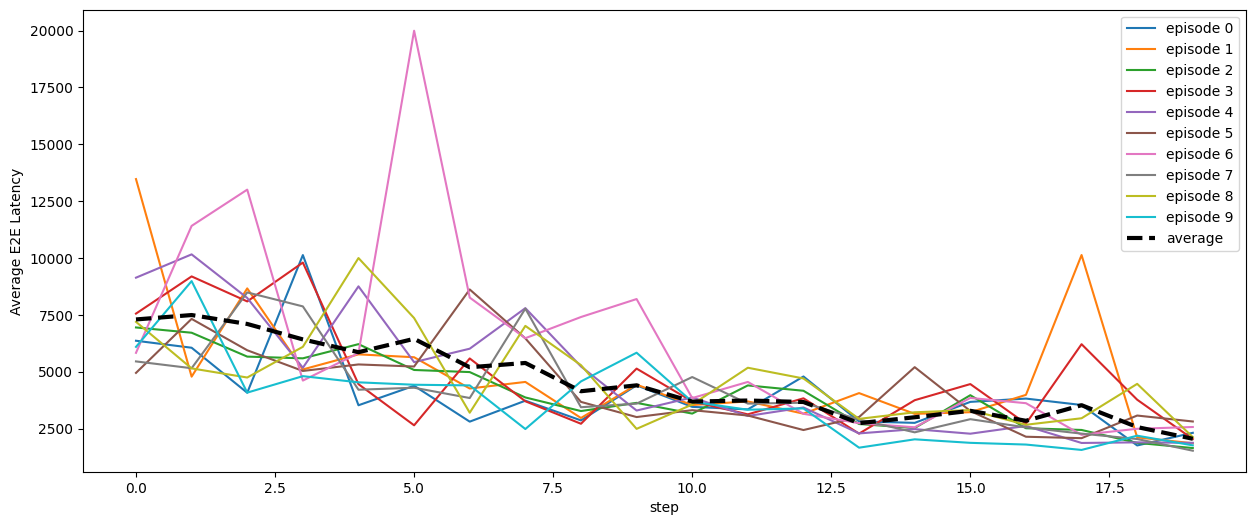

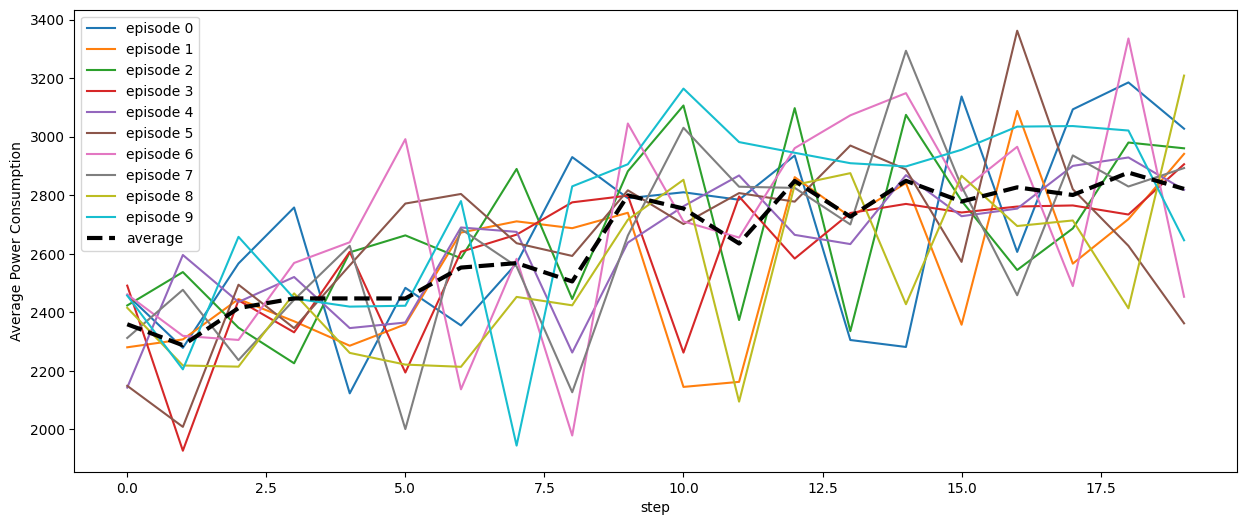

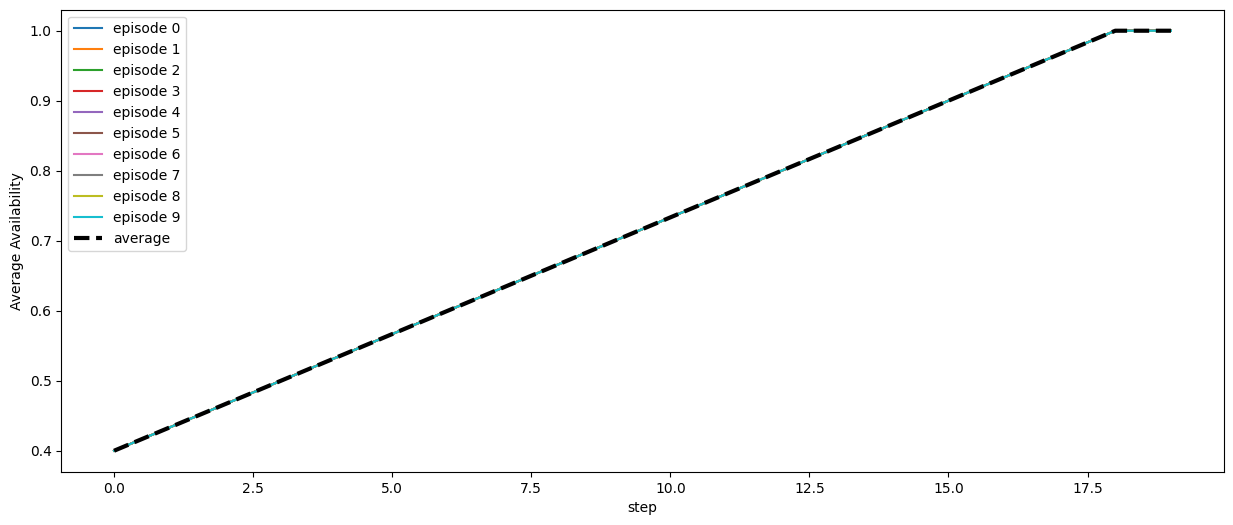

In [2]:
ks_infos = load_json("/home/dpnm/projects/rl/notebooks/data/ks_infos.json")

e2eLatency = np.array([[info["e2eLatency"]["latency"] for info in episode_infos] for episode_infos in ks_infos])
e2eCnt = np.array([[info["e2eLatency"]["count"] for info in episode_infos] for episode_infos in ks_infos])
e2eAvgLatency = (e2eLatency / e2eCnt)
e2eAvgLatency = e2eAvgLatency[:, 1:]

ks_total_avg_e2e_latency = draw_all_and_avg(e2eAvgLatency, "step", "Average E2E Latency")

avgPowerConsumption = np.array([[info["avgPowerConsumption"] for info in episode_infos] for episode_infos in ks_infos])
avgPowerConsumption = avgPowerConsumption[:, 1:]

ks_total_avg_power_consumption = draw_all_and_avg(avgPowerConsumption, "step", "Average Power Consumption")

avgAvailability = np.array([[info["availability"] for info in episode_infos] for episode_infos in ks_infos])
avgAvailability = avgAvailability[:, 1:]

ks_total_avg_availability = draw_all_and_avg(avgAvailability, "step", "Average Availability")

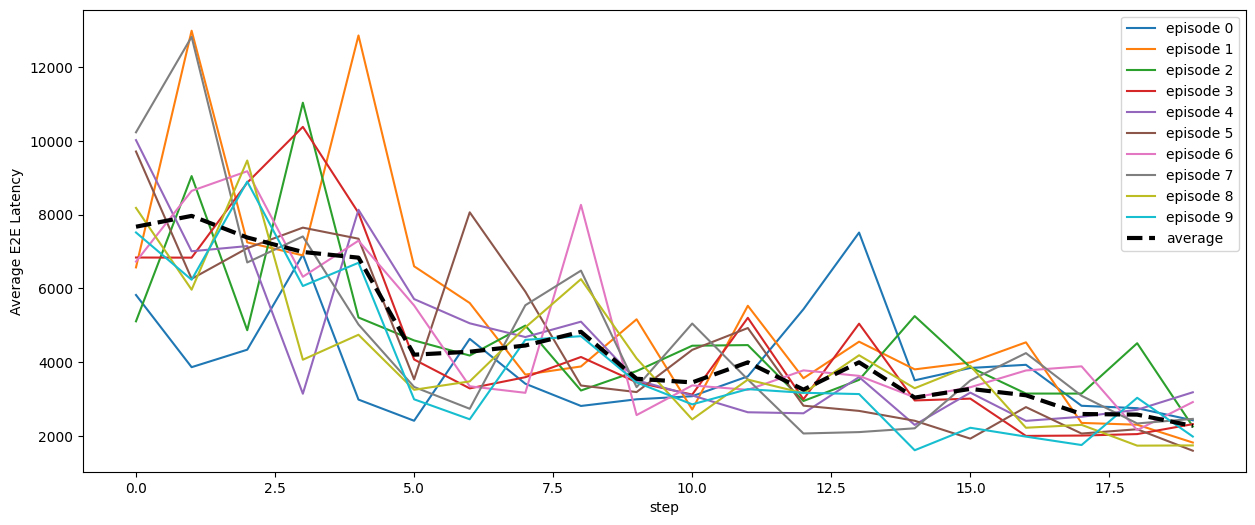

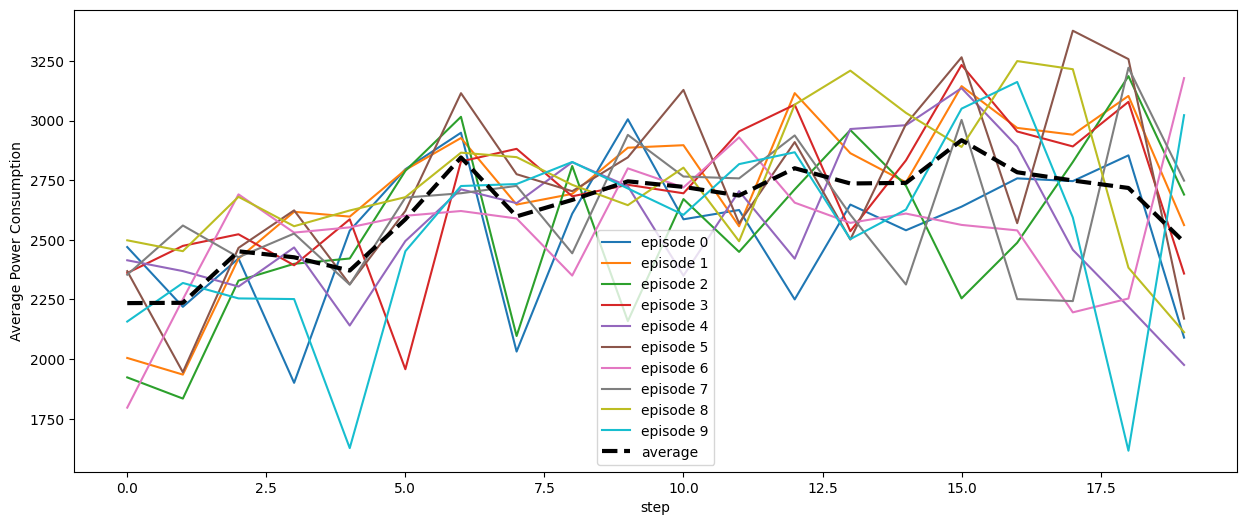

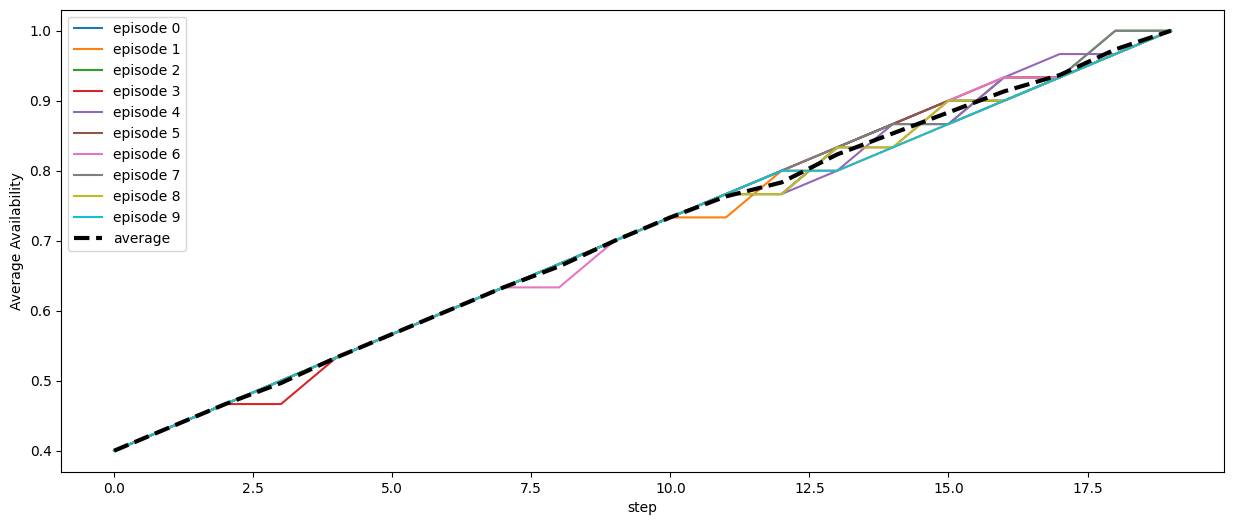

In [3]:
nm_infos = load_json("/home/dpnm/projects/rl/notebooks/data/nm_infos.json")

e2eLatency = np.array([[info["e2eLatency"]["latency"] for info in episode_infos] for episode_infos in nm_infos])
e2eCnt = np.array([[info["e2eLatency"]["count"] for info in episode_infos] for episode_infos in nm_infos])
e2eAvgLatency = e2eLatency / e2eCnt
e2eAvgLatency = e2eAvgLatency[:, 1:]

nm_total_avg_e2e_latency = draw_all_and_avg(e2eAvgLatency, "step", "Average E2E Latency")

avgPowerConsumption = np.array([[info["avgPowerConsumption"] for info in episode_infos] for episode_infos in nm_infos])
avgPowerConsumption = avgPowerConsumption[:, 1:]

nm_total_avg_power_consumption = draw_all_and_avg(avgPowerConsumption, "step", "Average Power Consumption")

avgAvailability = np.array([[info["availability"] for info in episode_infos] for episode_infos in nm_infos])
avgAvailability = avgAvailability[:, 1:]

nm_total_avg_availability = draw_all_and_avg(avgAvailability, "step", "Average Availability")

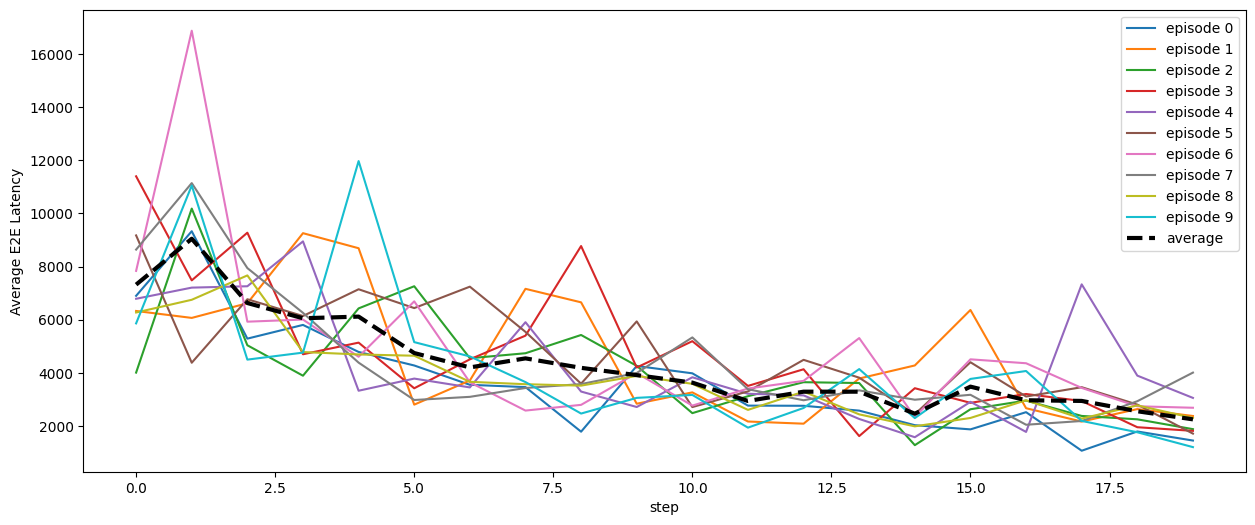

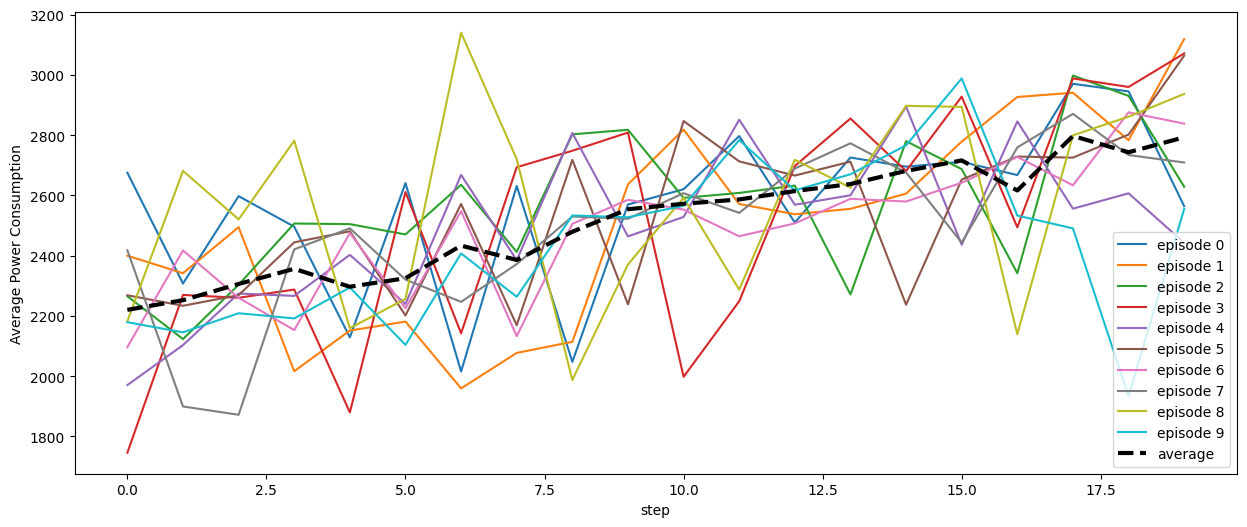

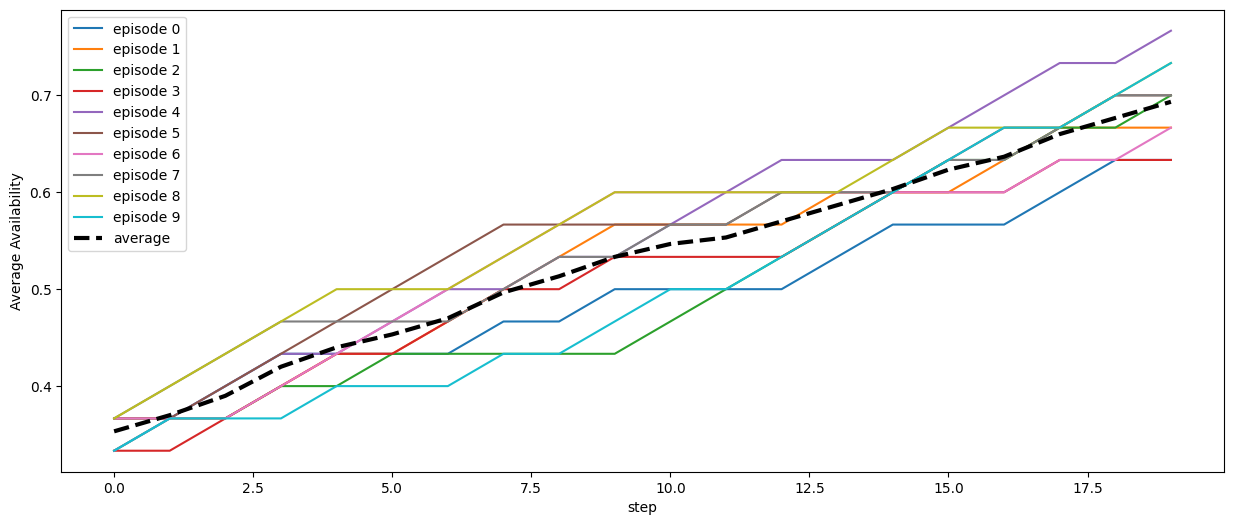

In [4]:
sac_v2_infos_3 = load_json("/home/dpnm/projects/rl/notebooks/data/sac_v2_infos_3.json")

e2eLatency = np.array([[info[0]["e2eLatency"]["latency"] for info in episode_infos] for episode_infos in sac_v2_infos_3])
e2eCnt = np.array([[info[0]["e2eLatency"]["count"] for info in episode_infos] for episode_infos in sac_v2_infos_3])
e2eAvgLatency = e2eLatency / e2eCnt

sac_v2_total_avg_e2e_latency_3 = draw_all_and_avg(e2eAvgLatency, "step", "Average E2E Latency")

avgPowerConsumption = np.array([[info[0]["avgPowerConsumption"] for info in episode_infos] for episode_infos in sac_v2_infos_3])

sac_v2_total_avg_power_consumption_3 = draw_all_and_avg(avgPowerConsumption, "step", "Average Power Consumption")

avgAvailability = np.array([[info[0]["availability"] for info in episode_infos] for episode_infos in sac_v2_infos_3])

sac_v2_total_avg_availability_3 = draw_all_and_avg(avgAvailability, "step", "Average Availability")

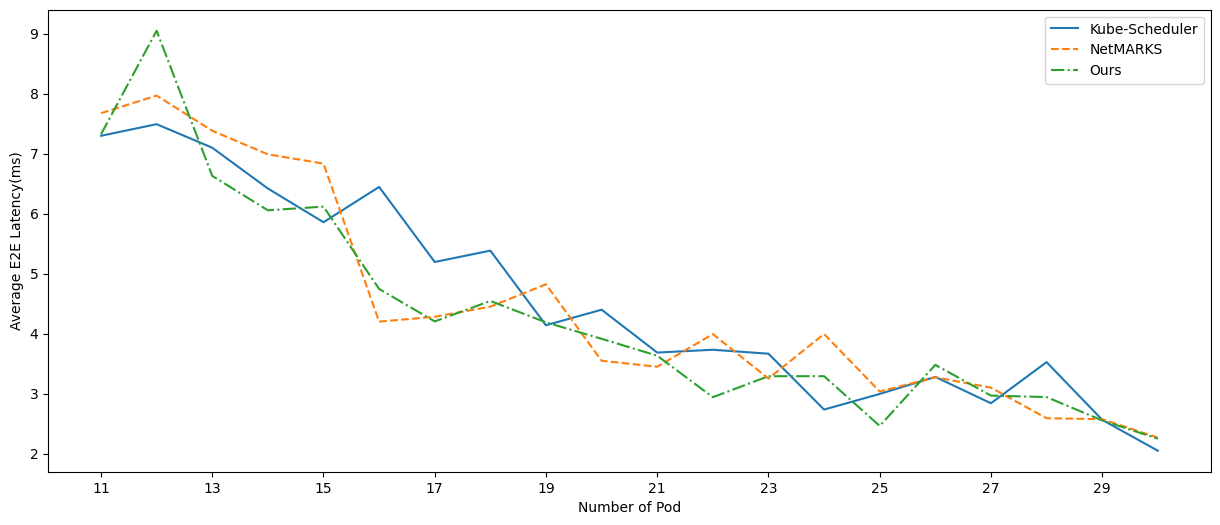

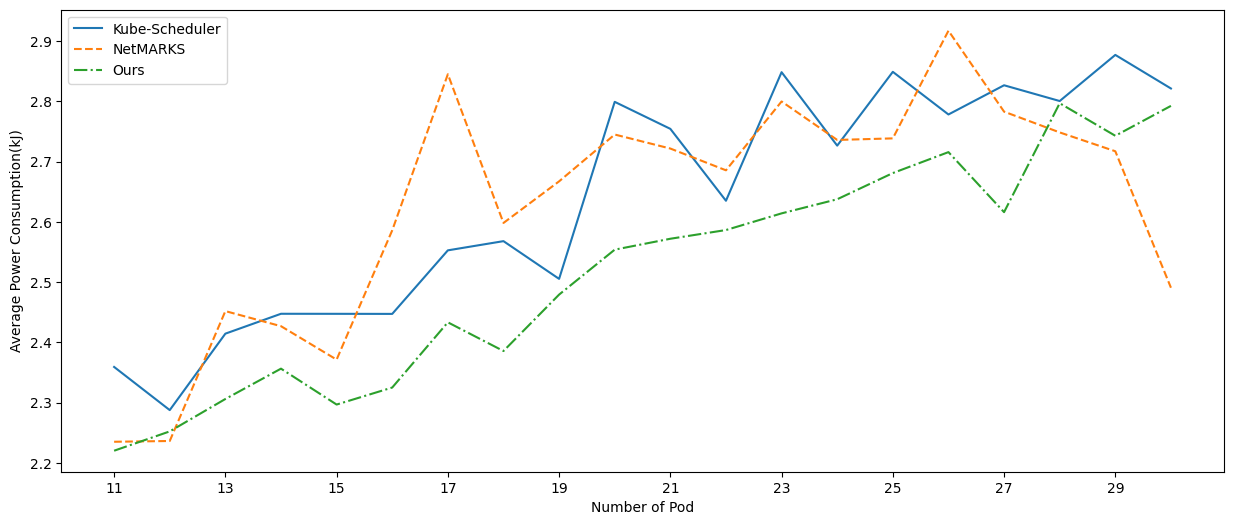

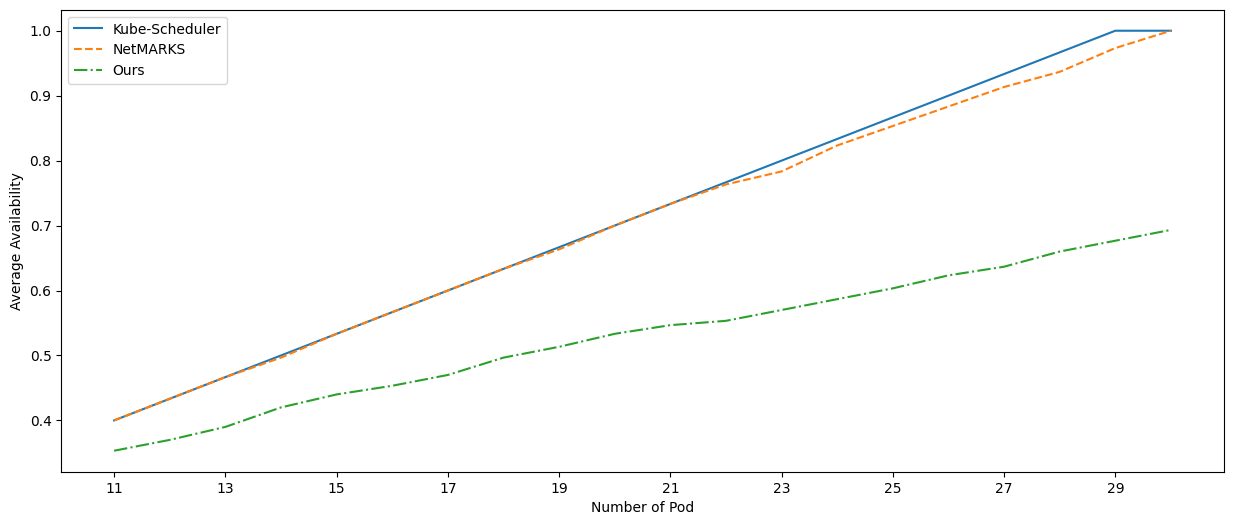

In [5]:

# latency
plt.figure(figsize=(15,6))

plt.plot(ks_total_avg_e2e_latency / 1000, label=f"Kube-Scheduler")
plt.plot(nm_total_avg_e2e_latency / 1000, label=f"NetMARKS", linestyle="--")
plt.plot(sac_v2_total_avg_e2e_latency_3 / 1000, label=f"Ours", linestyle="-.")


plt.xlabel("Number of Pod")
plt.xticks(np.arange(0, 19, 2), np.arange(0, 19, 2) + 11)
plt.ylabel("Average E2E Latency(ms)")
plt.legend()
plt.xticks(np.arange(0, 19, 2))
plt.show()



# power consumption

plt.figure(figsize=(15,6))

plt.plot(ks_total_avg_power_consumption / 1000, label=f"Kube-Scheduler")
plt.plot(nm_total_avg_power_consumption / 1000, label=f"NetMARKS", linestyle="--")
plt.plot(sac_v2_total_avg_power_consumption_3 / 1000, label=f"Ours", linestyle="-.")



plt.xlabel("Number of Pod")
plt.xticks(np.arange(0, 19, 2), np.arange(0, 19, 2) + 11)
plt.ylabel("Average Power Consumption(kJ)")
plt.legend()
plt.xticks(np.arange(0, 19, 2))
plt.show()


# availability

plt.figure(figsize=(15,6))

plt.plot(ks_total_avg_availability, label=f"Kube-Scheduler")
plt.plot(nm_total_avg_availability, label=f"NetMARKS", linestyle="--")
plt.plot(sac_v2_total_avg_availability_3, label=f"Ours", linestyle="-.")


plt.xlabel("Number of Pod")
plt.xticks(np.arange(0, 19, 2), np.arange(0, 19, 2) + 11)
plt.ylabel("Average Availability")
plt.legend()
plt.xticks(np.arange(0, 19, 2))
plt.show()

In [7]:
print(f"Average Latency\n\
Kube-Scheduler: {ks_total_avg_e2e_latency[:-1].mean()}, {ks_total_avg_e2e_latency[:-1].std()} \n\
NetMARKS: {nm_total_avg_e2e_latency[:-1].mean()}, {nm_total_avg_e2e_latency[:-1].std()} \n\
Ours: {sac_v2_total_avg_e2e_latency_3[:-1].mean() / 1000}, {sac_v2_total_avg_e2e_latency_3[:-1].std() / 1000}\n")

print(f"Average Power Consumption\n\
Kube-Scheduler: {ks_total_avg_power_consumption[:-1].mean()},{ks_total_avg_power_consumption[:-1].std()}\n\
NetMARKS: {nm_total_avg_power_consumption[:-1].mean()},{nm_total_avg_power_consumption[:-1].std()}\n\
Ours: {sac_v2_total_avg_power_consumption_3[:-1].mean() / 1000}, {sac_v2_total_avg_power_consumption_3[:-1].std() / 1000}\n")

print(f"Average Service Availability\n\
Kube-Scheduler: {ks_total_avg_availability[:-1].mean()}, {ks_total_avg_availability[:-1].std()}\n\
NetMARKS: {nm_total_avg_availability[:-1].mean()}, {nm_total_avg_availability[:-1].std()}\n\
Ours: {sac_v2_total_avg_availability_3[:-1].mean()}, {sac_v2_total_avg_availability_3[:-1].std()}\n")

Average Latency
Kube-Scheduler: 4670.456810131817, 1621.3658049588203 
NetMARKS: 4600.003699349487, 1764.1132373993444 
Ours: 2.462507418327075, 9.047693946908781

Average Power Consumption
Kube-Scheduler: 2627.669298245614,186.8337685264316
NetMARKS: 2632.1828947368426,192.8221455660995
Ours: 2.2199333333333335, 2.797075

Average Service Availability
Kube-Scheduler: 0.7000000000000001, 0.18257418583505539
NetMARKS: 0.6924561403508772, 0.1743856119167595
Ours: 0.0003533333333333333, 0.0006766666666666667



In [8]:
print(f"Average Latency\n\
Kube-Scheduler: {ks_total_avg_e2e_latency[:-1].max()}, {ks_total_avg_e2e_latency[:-1].min()} \n\
NetMARKS: {nm_total_avg_e2e_latency[:-1].max()}, {nm_total_avg_e2e_latency[:-1].min()} \n\
Ours: {sac_v2_total_avg_e2e_latency_3[:-1].max() / 1000}, {sac_v2_total_avg_e2e_latency_3[:-1].min() / 1000}\n")

print(f"Average Power Consumption\n\
Kube-Scheduler: {ks_total_avg_power_consumption[:-1].max()},{ks_total_avg_power_consumption[:-1].min()}\n\
NetMARKS: {nm_total_avg_power_consumption[:-1].max()},{nm_total_avg_power_consumption[:-1].min()}\n\
Ours: {sac_v2_total_avg_power_consumption_3[:-1].max() / 1000}, {sac_v2_total_avg_power_consumption_3[:-1].min() / 1000}\n")

print(f"Average Service Availability\n\
Kube-Scheduler: {ks_total_avg_availability[:-1].max()}, {ks_total_avg_availability[:-1].min()}\n\
NetMARKS: {nm_total_avg_availability[:-1].max()}, {nm_total_avg_availability[:-1].min()}\n\
Ours: {sac_v2_total_avg_availability_3[:-1].max()}, {sac_v2_total_avg_availability_3[:-1].min()}\n")

Average Latency
Kube-Scheduler: 7490.336864948401, 2563.567596131841 
NetMARKS: 7967.154725437713, 2573.9544733517205 
Ours: 9.047693946908781, 2.462507418327075

Average Power Consumption
Kube-Scheduler: 2877.333333333333,2287.391666666667
NetMARKS: 2917.508333333333,2234.825
Ours: 2.797075, 2.2199333333333335

Average Service Availability
Kube-Scheduler: 1.0, 0.39999999999999997
NetMARKS: 0.9733333333333334, 0.39999999999999997
Ours: 0.6766666666666666, 0.35333333333333333



## Evaluation 2
- GNN power
    - SAC Linear
    - SAC GNN

In [ ]:
sac_linear_infos = load_json("/home/dpnm/projects/rl/notebooks/data/sac_linear_infos.json")

e2eLatency = np.array([[info[0]["e2eLatency"]["latency"] for info in episode_infos] for episode_infos in sac_linear_infos])
e2eCnt = np.array([[info[0]["e2eLatency"]["count"] for info in episode_infos] for episode_infos in sac_linear_infos])
e2eAvgLatency = e2eLatency / e2eCnt

sac_linear_total_avg_e2e_latency = draw_all_and_avg(e2eAvgLatency, "step", "Average E2E Latency")

avgPowerConsumption = np.array([[info[0]["avgPowerConsumption"] for info in episode_infos] for episode_infos in sac_linear_infos])

sac_linear_total_avg_power_consumption = draw_all_and_avg(avgPowerConsumption, "step", "Average Power Consumption")

avgAvailability = np.array([[info[0]["availability"] for info in episode_infos] for episode_infos in sac_linear_infos])

sac_linear_total_avg_availability = draw_all_and_avg(avgAvailability, "step", "Average Availability")

In [ ]:
sac_v3_infos = load_json("/home/dpnm/projects/rl/notebooks/data/sac_v3_infos.json")

e2eLatency = np.array([[info[0]["e2eLatency"]["latency"] for info in episode_infos] for episode_infos in sac_v3_infos])
e2eCnt = np.array([[info[0]["e2eLatency"]["count"] for info in episode_infos] for episode_infos in sac_v3_infos])
e2eAvgLatency = e2eLatency / e2eCnt

sac_v3_total_avg_e2e_latency = draw_all_and_avg(e2eAvgLatency, "step", "Average E2E Latency")

avgPowerConsumption = np.array([[info[0]["avgPowerConsumption"] for info in episode_infos] for episode_infos in sac_v3_infos])

sac_v3_total_avg_power_consumption = draw_all_and_avg(avgPowerConsumption, "step", "Average Power Consumption")

avgAvailability = np.array([[info[0]["availability"] for info in episode_infos] for episode_infos in sac_v3_infos])

sac_v3_total_avg_availability = draw_all_and_avg(avgAvailability, "step", "Average Availability")

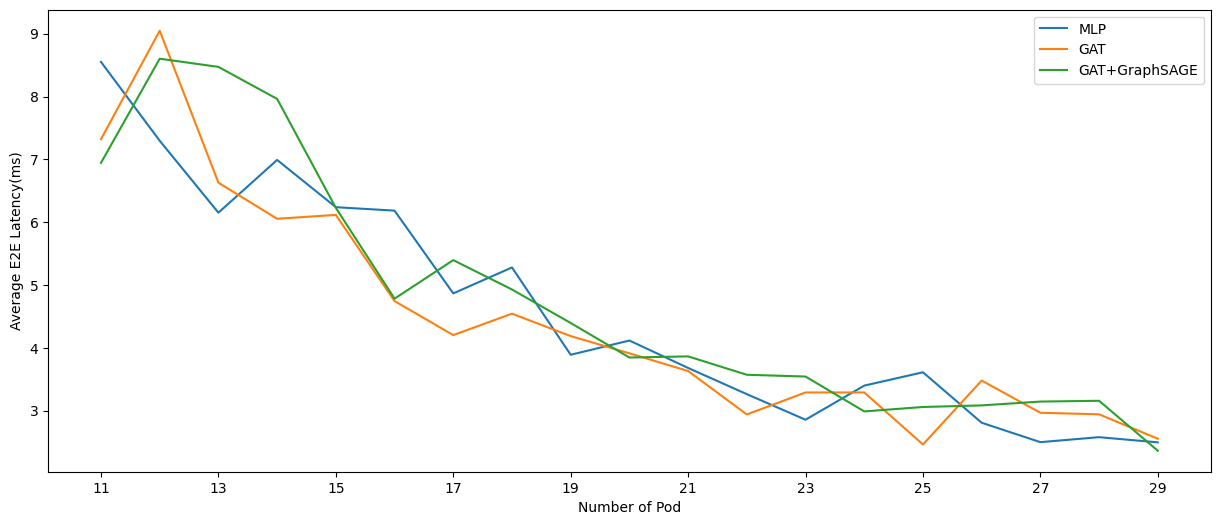

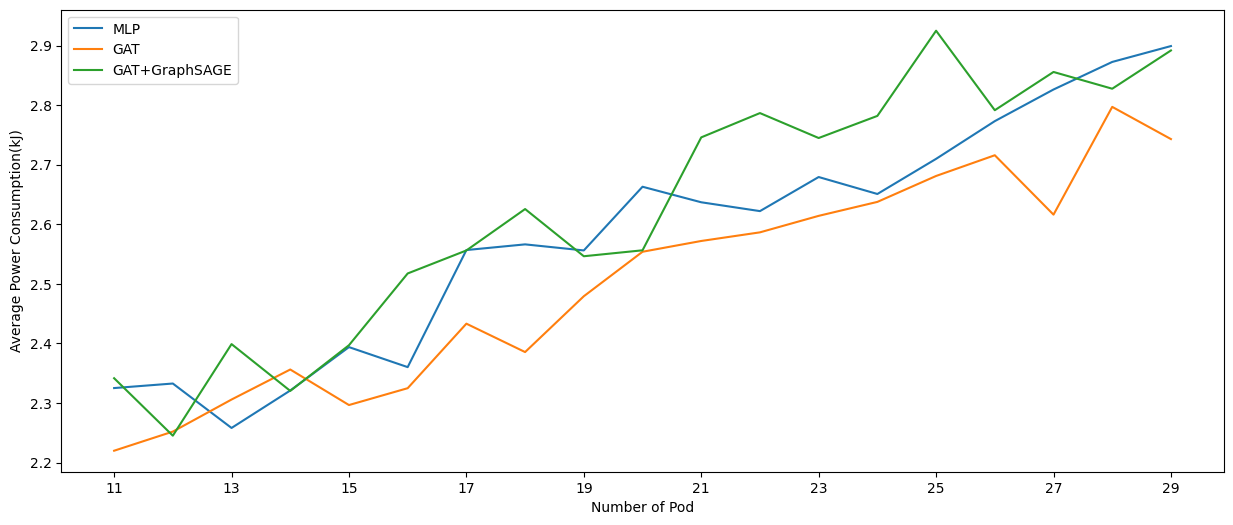

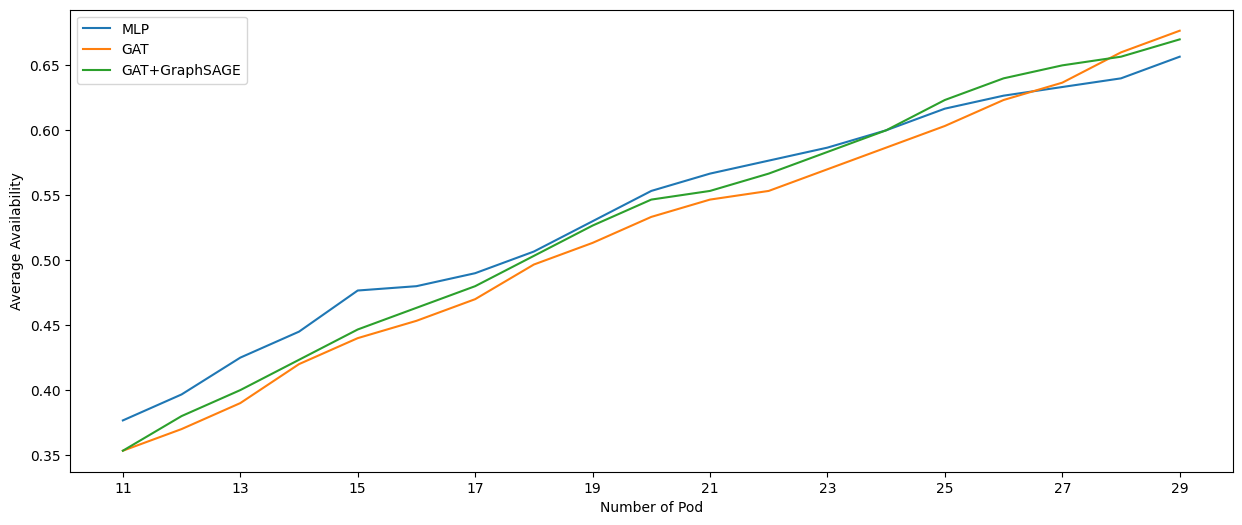

In [ ]:

# latency
plt.figure(figsize=(15,6))

plt.plot(sac_linear_total_avg_e2e_latency[:-1] / 1000, label=f"MLP")
plt.plot(sac_v2_total_avg_e2e_latency_3[:-1] / 1000, label=f"GAT", linestyle="--")
plt.plot(sac_v3_total_avg_e2e_latency[:-1] / 1000, label=f"GAT+GraphSAGE", linestyle="-.")

plt.xlabel("Number of Pod")
plt.xticks(np.arange(0, 19, 2), np.arange(0, 19, 2) + 11)
plt.ylabel("Average E2E Latency(ms)")
plt.legend()
plt.xticks(np.arange(0, 19, 2))
plt.show()



# power consumption

plt.figure(figsize=(15,6))

plt.plot(sac_linear_total_avg_power_consumption[:-1] / 1000, label=f"MLP")
plt.plot(sac_v2_total_avg_power_consumption_3[:-1] / 1000, label=f"GAT", linestyle="--")
plt.plot(sac_v3_total_avg_power_consumption[:-1] / 1000, label=f"GAT+GraphSAGE", linestyle="-.")



plt.xlabel("Number of Pod")
plt.xticks(np.arange(0, 19, 2), np.arange(0, 19, 2) + 11)
plt.ylabel("Average Power Consumption(kJ)")
plt.legend()
plt.xticks(np.arange(0, 19, 2))
plt.show()


# availability

plt.figure(figsize=(15,6))

plt.plot(sac_linear_total_avg_availability[:-1], label=f"MLP")
plt.plot(sac_v2_total_avg_availability_3[:-1], label=f"GAT", linestyle="--")
plt.plot(sac_v3_total_avg_availability[:-1], label=f"GAT+GraphSAGE", linestyle="-.")


plt.xlabel("Number of Pod")
plt.xticks(np.arange(0, 19, 2), np.arange(0, 19, 2) + 11)
plt.ylabel("Average Availability")
plt.legend()
plt.xticks(np.arange(0, 19, 2))
plt.show()

In [ ]:
print(f"Average Latency\n\
SAC(Linear): {sac_linear_total_avg_e2e_latency[:-1].mean() / 1000}, {sac_linear_total_avg_e2e_latency[:-1].std() / 1000}\n\
SAC(GAT): {sac_v2_total_avg_e2e_latency_3[:-1].mean() / 1000}, {sac_v2_total_avg_e2e_latency_3[:-1].std() / 1000}\n\
SAC(GATv2+SAGE): {sac_v3_total_avg_e2e_latency[:-1].mean() / 1000}, {sac_v3_total_avg_e2e_latency[:-1].std() / 1000}\n")

print(f"Average Power Consumption\n\
SAC(Linear): {sac_linear_total_avg_power_consumption[:-1].mean() / 1000}, {sac_linear_total_avg_power_consumption[:-1].std() / 1000}\n\
SAC(GAT): {sac_v2_total_avg_power_consumption_3[:-1].mean() / 1000}, {sac_v2_total_avg_power_consumption_3[:-1].std() / 1000}\n\
SAC(GATv2+SAGE): {sac_v3_total_avg_power_consumption[:-1].mean() / 1000}, {sac_v3_total_avg_power_consumption[:-1].std() / 1000}\n")

print(f"Average Service Availability\n\
SAC(Linear): {sac_linear_total_avg_availability[:-1].mean()}, {sac_linear_total_avg_availability[:-1].std()}\n\
SAC(GAT): {sac_v2_total_avg_availability_3[:-1].mean()}, {sac_v2_total_avg_availability_3[:-1].std()}\n\
SAC(GATv2+SAGE): {sac_v3_total_avg_availability[:-1].mean()}, {sac_v3_total_avg_availability[:-1].std()}\n")

Average Latency
SAC(Linear): 4.566551360109159, 1.8017335417670046
SAC(GAT): 4.539798072947315, 1.844016420195706
SAC(GAT): 4.438121731097826, 1.7559252256551279
SAC(GATv2+SAGE): 4.754917781805734, 1.9272963037094926

Average Power Consumption
SAC(Linear): 2.5791206140350877, 0.19330786467091504
SAC(GAT): 2.6112644736842108, 0.2080518044785938
SAC(GAT): 2.503728070175439, 0.1740808063611603
SAC(GATv2+SAGE): 2.623970614035087, 0.20653188166955738

Average Service Availability
SAC(Linear): 0.5359649122807018, 0.08404488460638797
SAC(GAT): 0.5571929824561405, 0.10826793252811272
SAC(GAT): 0.5208771929824562, 0.09608623140598689
SAC(GATv2+SAGE): 0.5298245614035088, 0.09661809841120397



In [ ]:
print(f"Average Latency\n\
SAC(Linear): {sac_linear_total_avg_e2e_latency[:-1].min() / 1000}, {sac_linear_total_avg_e2e_latency[:-1].max() / 1000}\n\
SAC(GAT): {sac_v2_total_avg_e2e_latency_3[:-1].min() / 1000}, {sac_v2_total_avg_e2e_latency_3[:-1].max() / 1000}\n\
SAC(GATv2+SAGE): {sac_v3_total_avg_e2e_latency[:-1].min() / 1000}, {sac_v3_total_avg_e2e_latency[:-1].max() / 1000}\n")

print(f"Average Power Consumption\n\
SAC(Linear): {sac_linear_total_avg_power_consumption[:-1].min() / 1000}, {sac_linear_total_avg_power_consumption[:-1].max() / 1000}\n\
SAC(GAT): {sac_v2_total_avg_power_consumption_3[:-1].min() / 1000}, {sac_v2_total_avg_power_consumption_3[:-1].max() / 1000}\n\
SAC(GATv2+SAGE): {sac_v3_total_avg_power_consumption[:-1].min() / 1000}, {sac_v3_total_avg_power_consumption[:-1].max() / 1000}\n")

print(f"Average Service Availability\n\
SAC(Linear): {sac_linear_total_avg_availability[:-1].min()}, {sac_linear_total_avg_availability[:-1].max()}\n\
SAC(GAT): {sac_v2_total_avg_availability_3[:-1].min()}, {sac_v2_total_avg_availability_3[:-1].max()}\n\
SAC(GATv2+SAGE): {sac_v3_total_avg_availability[:-1].min()}, {sac_v3_total_avg_availability[:-1].max()}\n")

Average Latency
SAC(Linear): 2.4962054793108206, 8.551427074824534
SAC(GAT): 2.3397630912911596, 7.565256301072805
SAC(GAT): 2.462507418327075, 9.047693946908781
SAC(GATv2+SAGE): 2.363303305491222, 8.602247005552233

Average Power Consumption
SAC(Linear): 2.25815, 2.899141666666667
SAC(GAT): 2.2097249999999997, 2.915475
SAC(GAT): 2.2199333333333335, 2.797075
SAC(GATv2+SAGE): 2.2451666666666665, 2.924891666666667

Average Service Availability
SAC(Linear): 0.37666666666666665, 0.6566666666666665
SAC(GAT): 0.36, 0.7166666666666666
SAC(GAT): 0.35333333333333333, 0.6766666666666666
SAC(GATv2+SAGE): 0.3533333333333334, 0.6699999999999999



## Evaluation 3
- RL method
    - DQN vs TD3 vs SAC

In [ ]:
dqn_infos = load_json("/home/dpnm/projects/rl/notebooks/data/dqn_infos.json")

e2eLatency = np.array([[info[0]["e2eLatency"]["latency"] for info in episode_infos] for episode_infos in dqn_infos])
e2eCnt = np.array([[info[0]["e2eLatency"]["count"] for info in episode_infos] for episode_infos in dqn_infos])
e2eAvgLatency = e2eLatency / e2eCnt

dqn_total_avg_e2e_latency = draw_all_and_avg(e2eAvgLatency, "step", "Average E2E Latency")

avgPowerConsumption = np.array([[info[0]["avgPowerConsumption"] for info in episode_infos] for episode_infos in dqn_infos])

dqn_total_avg_power_consumption = draw_all_and_avg(avgPowerConsumption, "step", "Average Power Consumption")

avgAvailability = np.array([[info[0]["availability"] for info in episode_infos] for episode_infos in dqn_infos])

dqn_total_avg_availability = draw_all_and_avg(avgAvailability, "step", "Average Availability")

In [ ]:
td3_v2_infos = load_json("/home/dpnm/projects/rl/notebooks/data/td3_v2_infos.json")

e2eLatency = np.array([[info[0]["e2eLatency"]["latency"] for info in episode_infos] for episode_infos in td3_v2_infos])
e2eCnt = np.array([[info[0]["e2eLatency"]["count"] for info in episode_infos] for episode_infos in td3_v2_infos])
e2eAvgLatency = e2eLatency / e2eCnt

td3_v2_total_avg_e2e_latency = draw_all_and_avg(e2eAvgLatency, "step", "Average E2E Latency")

avgPowerConsumption = np.array([[info[0]["avgPowerConsumption"] for info in episode_infos] for episode_infos in td3_v2_infos])

td3_v2_total_avg_power_consumption = draw_all_and_avg(avgPowerConsumption, "step", "Average Power Consumption")

avgAvailability = np.array([[info[0]["availability"] for info in episode_infos] for episode_infos in td3_v2_infos])

td3_v2_total_avg_availability = draw_all_and_avg(avgAvailability, "step", "Average Availability")

In [ ]:
sac_v2_infos = load_json("/home/dpnm/projects/rl/notebooks/data/sac_v2_infos.json")

e2eLatency = np.array([[info[0]["e2eLatency"]["latency"] for info in episode_infos] for episode_infos in sac_v2_infos])
e2eCnt = np.array([[info[0]["e2eLatency"]["count"] for info in episode_infos] for episode_infos in sac_v2_infos])
e2eAvgLatency = e2eLatency / e2eCnt

sac_v2_total_avg_e2e_latency = draw_all_and_avg(e2eAvgLatency, "step", "Average E2E Latency")

avgPowerConsumption = np.array([[info[0]["avgPowerConsumption"] for info in episode_infos] for episode_infos in sac_v2_infos])

sac_v2_total_avg_power_consumption = draw_all_and_avg(avgPowerConsumption, "step", "Average Power Consumption")

avgAvailability = np.array([[info[0]["availability"] for info in episode_infos] for episode_infos in sac_v2_infos])

sac_v2_total_avg_availability = draw_all_and_avg(avgAvailability, "step", "Average Availability")

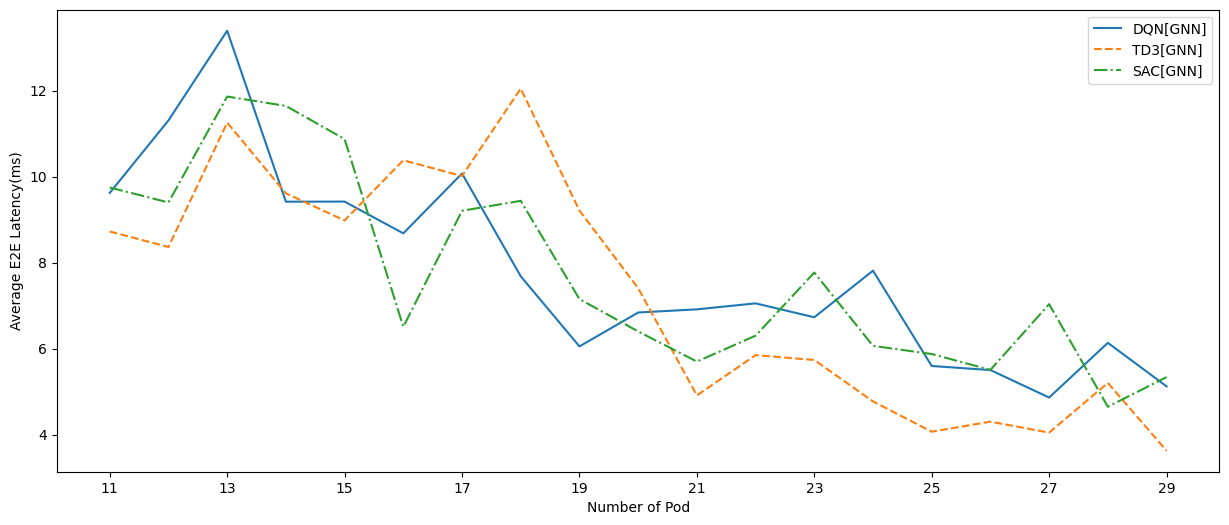

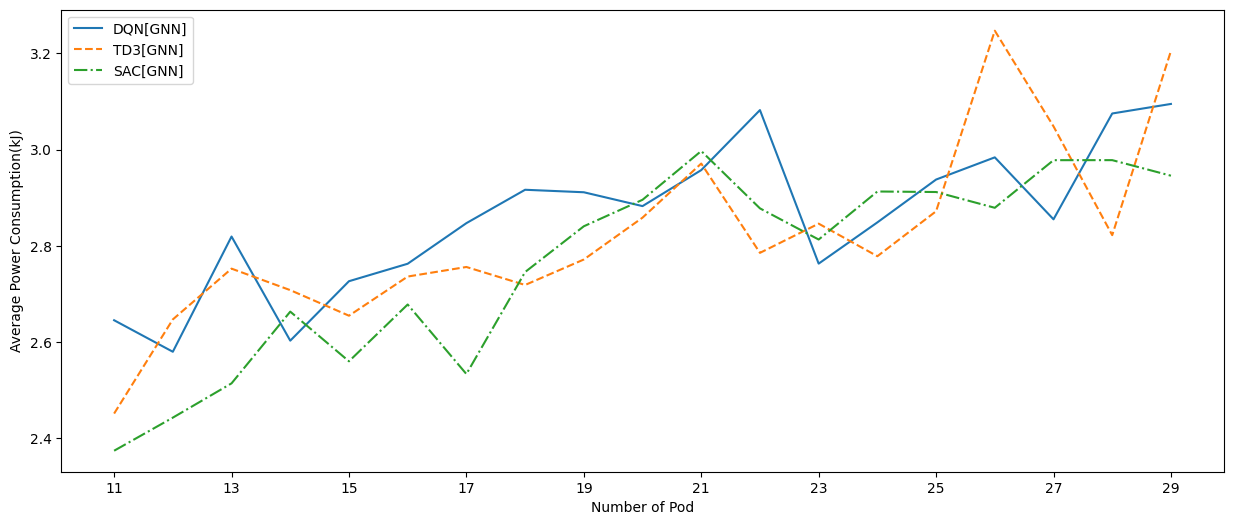

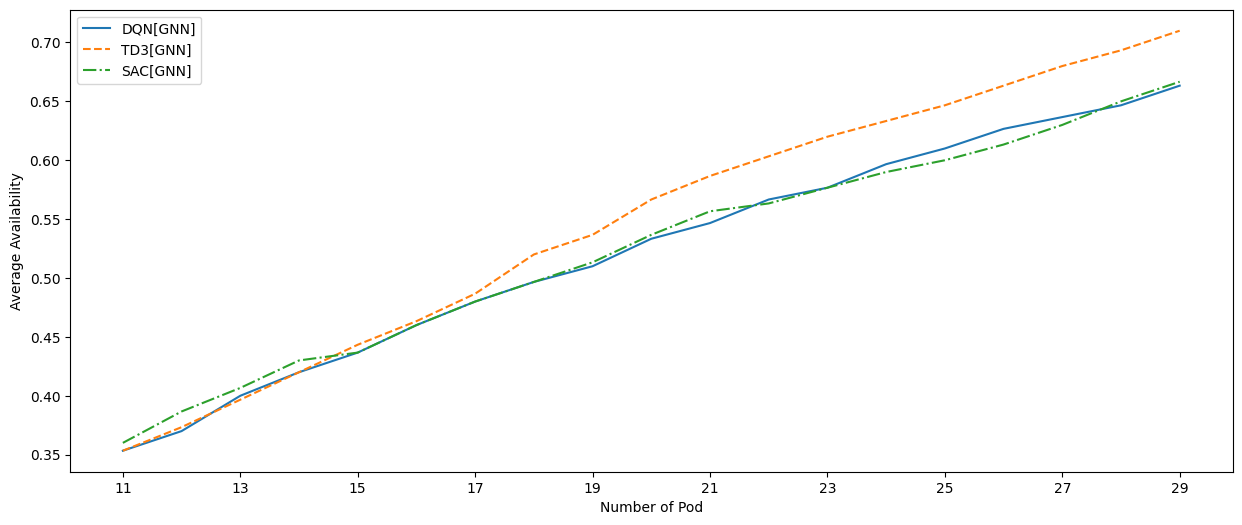

In [ ]:

# latency
plt.figure(figsize=(15,6))

plt.plot(dqn_total_avg_e2e_latency[:-1] / 1000, label=f"DQN[GNN]")
plt.plot(td3_v2_total_avg_e2e_latency[:-1] / 1000, label=f"TD3[GNN]", linestyle="--")
plt.plot(sac_v2_total_avg_e2e_latency[:-1] / 1000, label=f"SAC[GNN]", linestyle="-.")

plt.xlabel("Number of Pod")
plt.xticks(np.arange(0, 19, 2), np.arange(0, 19, 2) + 11)
plt.ylabel("Average E2E Latency(ms)")
plt.legend()
plt.show()



# power consumption

plt.figure(figsize=(15,6))

plt.plot(dqn_total_avg_power_consumption[:-1] / 1000, label=f"DQN[GNN]")
plt.plot(sac_v2_total_avg_power_consumption[:-1] / 1000, label=f"TD3[GNN]", linestyle="--")
plt.plot(td3_v2_total_avg_power_consumption[:-1] / 1000, label=f"SAC[GNN]", linestyle="-.")


plt.xlabel("Number of Pod")
plt.xticks(np.arange(0, 19, 2), np.arange(0, 19, 2) + 11)
plt.ylabel("Average Power Consumption(kJ)")
plt.legend()
plt.show()


# availability

plt.figure(figsize=(15,6))

plt.plot(dqn_total_avg_availability[:-1], label=f"DQN[GNN]")
plt.plot(sac_v2_total_avg_availability[:-1], label=f"TD3[GNN]", linestyle="--")
plt.plot(td3_v2_total_avg_availability[:-1], label=f"SAC[GNN]", linestyle="-.")

plt.xlabel("Number of Pod")
plt.xticks(np.arange(0, 19, 2), np.arange(0, 19, 2) + 11)
plt.ylabel("Average Availability")
plt.legend()
plt.show()

In [ ]:
print(f"Average Latency\n\
DQN(GNN): {dqn_total_avg_e2e_latency[:-1].mean()}\n\
SAC(GNN): {sac_v2_total_avg_e2e_latency[:-1].mean()}\n\
TD3(GNN): {td3_v2_total_avg_e2e_latency[:-1].mean()}\n")

print(f"Average Power Consumption\n\
DQN(GNN): {dqn_total_avg_power_consumption[:-1].mean()}\n\
SAC(GNN): {sac_v2_total_avg_power_consumption[:-1].mean()}\n\
TD3(GNN): {td3_v2_total_avg_power_consumption[:-1].mean()}\n")

print(f"Average Service Availability\n\
DQN(GNN): {dqn_total_avg_availability[:-1].mean()}\n\
SAC(GNN): {sac_v2_total_avg_availability[:-1].mean()}\n\
TD3(GNN): {td3_v2_total_avg_availability[:-1].mean()}\n")

Average Latency
DQN(GNN): 7801.208644710815
SAC(GNN): 7709.165376931709
TD3(GNN): 7290.615901302033

Average Power Consumption
DQN(GNN): 2857.3881578947367
SAC(GNN): 2822.5236842105264
TD3(GNN): 2765.222368421053

Average Service Availability
DQN(GNN): 0.5226315789473684
SAC(GNN): 0.5471929824561403
TD3(GNN): 0.5238596491228071



In [ ]:
print(f"Average Latency\n\
DQN(GNN): {dqn_total_avg_e2e_latency[:-1].max()}\n\
SAC(GNN): {sac_v2_total_avg_e2e_latency[:-1].max()}\n\
TD3(GNN): {td3_v2_total_avg_e2e_latency[:-1].max()}\n")

print(f"Average Power Consumption\n\
DQN(GNN): {dqn_total_avg_power_consumption[:-1].max()}\n\
SAC(GNN): {sac_v2_total_avg_power_consumption[:-1].max()}\n\
TD3(GNN): {td3_v2_total_avg_power_consumption[:-1].max()}\n")

print(f"Average Service Availability\n\
DQN(GNN): {dqn_total_avg_availability[:-1].min()}\n\
SAC(GNN): {sac_v2_total_avg_availability[:-1].min()}\n\
TD3(GNN): {td3_v2_total_avg_availability[:-1].min()}\n")

Average Latency
DQN(GNN): 13392.217915148405
SAC(GNN): 11862.186485312677
TD3(GNN): 12047.71971788682

Average Power Consumption
DQN(GNN): 3094.9
SAC(GNN): 3247.125
TD3(GNN): 2996.991666666667

Average Service Availability
DQN(GNN): 0.35333333333333333
SAC(GNN): 0.35333333333333333
TD3(GNN): 0.36



In [ ]:
print(f"Average Latency\n\
DQN(GNN): {dqn_total_avg_e2e_latency[:-1].min()}\n\
SAC(GNN): {sac_v2_total_avg_e2e_latency[:-1].min()}\n\
TD3(GNN): {td3_v2_total_avg_e2e_latency[:-1].min()}\n")

print(f"Average Power Consumption\n\
DQN(GNN): {dqn_total_avg_power_consumption[:-1].min()}\n\
SAC(GNN): {sac_v2_total_avg_power_consumption[:-1].min()}\n\
TD3(GNN): {td3_v2_total_avg_power_consumption[:-1].min()}\n")

print(f"Average Service Availability\n\
DQN(GNN): {dqn_total_avg_availability[:-1].max()}\n\
SAC(GNN): {sac_v2_total_avg_availability[:-1].max()}\n\
TD3(GNN): {td3_v2_total_avg_availability[:-1].max()}\n")

Average Latency
DQN(GNN): 4863.742554467337
SAC(GNN): 4649.70004894325
TD3(GNN): 3627.342353980725

Average Power Consumption
DQN(GNN): 2579.641666666667
SAC(GNN): 2451.141666666667
TD3(GNN): 2373.883333333333

Average Service Availability
DQN(GNN): 0.6633333333333333
SAC(GNN): 0.7100000000000001
TD3(GNN): 0.6666666666666667



In [ ]:
print(f"Average Latency\n\
DQN(GNN): {dqn_total_avg_e2e_latency[:-1].std()}\n\
SAC(GNN): {sac_v2_total_avg_e2e_latency[:-1].std()}\n\
TD3(GNN): {td3_v2_total_avg_e2e_latency[:-1].std()}\n")

print(f"Average Power Consumption\n\
DQN(GNN): {dqn_total_avg_power_consumption[:-1].std()}\n\
SAC(GNN): {sac_v2_total_avg_power_consumption[:-1].std()}\n\
TD3(GNN): {td3_v2_total_avg_power_consumption[:-1].std()}\n")

print(f"Average Service Availability\n\
DQN(GNN): {dqn_total_avg_availability[:-1].std()}\n\
SAC(GNN): {sac_v2_total_avg_availability[:-1].std()}\n\
TD3(GNN): {td3_v2_total_avg_availability[:-1].std()}\n")

Average Latency
DQN(GNN): 2215.007213809854
SAC(GNN): 2186.187826678616
TD3(GNN): 2661.002517260157

Average Power Consumption
DQN(GNN): 148.23829784578217
SAC(GNN): 184.61472993966544
TD3(GNN): 192.68373120440805

Average Service Availability
DQN(GNN): 0.09435889522473881
SAC(GNN): 0.11137242279371143
TD3(GNN): 0.09003094437417686

